In [1]:
import pandas as pd
import seaborn as sns
from sklearn.neighbors import KDTree

In [2]:
fname = "../csv/iris_large.csv"
data = pd.read_csv(fname, delimiter=' ', header=0)
print(data)

      sepal_len  sepal_wid  petal_len  petal_wid          species
0      9.244480    7.60697    4.09570    6.77380   Iris-virginica
1      6.265530    6.99683    3.92810    4.91140   Iris-virginica
2      6.751440    3.58948    7.68593    8.75175   Iris-virginica
3      1.548480    5.36283    7.35442    3.86181   Iris-virginica
4      4.779240    9.94172    1.17725    9.46061  Iris-versicolor
...         ...        ...        ...        ...              ...
9995   9.219160    1.13951    3.21475    1.99785  Iris-versicolor
9996   4.652160    5.60719    6.36031    4.76450   Iris-virginica
9997   7.465590    8.25515    9.80974    6.86652   Iris-virginica
9998   0.869625    5.84315    5.74667    9.94332      Iris-setosa
9999   6.992820    2.13700    4.61055    4.68327   Iris-virginica

[10000 rows x 5 columns]


In [3]:
print('\nbuilding kd-tree...', end='')
kdt = KDTree(data.iloc[:,0:4], leaf_size=1, metric='euclidean')
print(' done')


building kd-tree... done


In [4]:
x = [41.1, 32.2, 23.3, 14.4]
print('\n  my measurements [sepal_len, sepal_wid, petal_len, petal_wid] are: ', x)


  my measurements [sepal_len, sepal_wid, petal_len, petal_wid] are:  [41.1, 32.2, 23.3, 14.4]


In [37]:
dist, idx = kdt.query([x], k=5)
print(f'    -> the iris {x} is closest to type {data.iloc[idx[0, 0],4]}')

    -> the iris [41.1, 32.2, 23.3, 14.4] is closest to type Iris-virginica


In [39]:
print(f'\t Index/indices of the {len(idx[0])} closest point(s): {str(idx[0])}')
print(f'\t Distance(s) to the {len(dist[0])} closest point(s): {str(dist[0])}')
print((41.30594886+41.40730265+41.62237909+41.64224525+41.72873708)/5)

	 Index/indices of the 5 closest point(s): [6273  799 8540 6101 3708]
	 Distance(s) to the 5 closest point(s): [41.30594886 41.40730265 41.62237909 41.64224525 41.72873708]
41.541322586


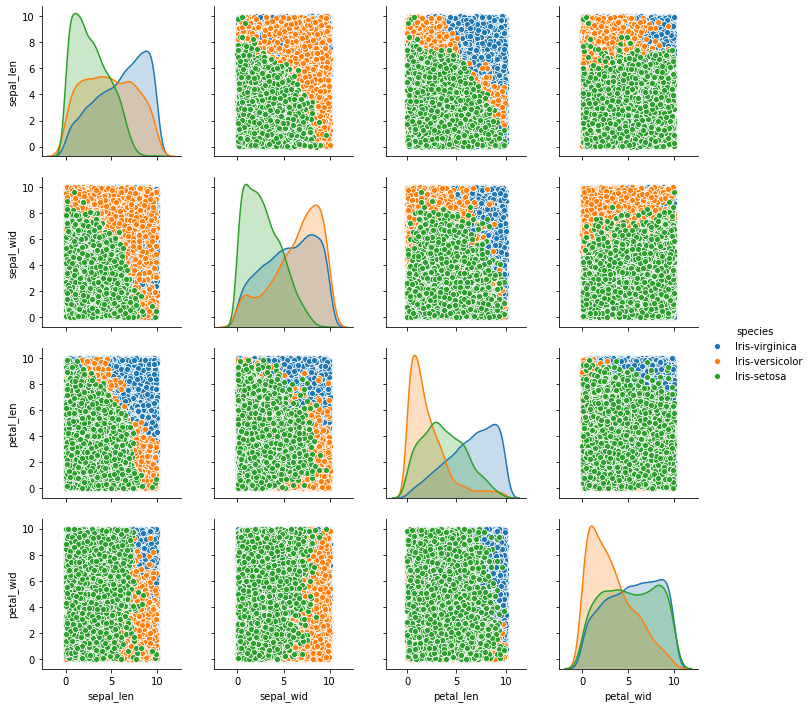

In [16]:
sns.pairplot(data, hue="species")